In [13]:
#импортируем необходимые модули
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import time
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from math import log

In [14]:
#считываем таблицу с признаками
features = pd.read_csv('./features.csv', index_col='match_id')


In [15]:
#выделяем столбец с целевой переменной
y = features['radiant_win']


In [16]:
#удаялем признаки, отсутствующие в тестовой выборке, формируем тренировочную выборку
X = features.drop(['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis='columns')

In [17]:
#проверяеме выборку на наличие пропусков 
features.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [18]:
# названия признаков, имеющих пропуски с обоснованиями
'''
first_blood_time - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_team - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_player1 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_player2 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
radiant_bottle_time - время первого приобретения командой предмета "bottle", пусто если не приобрели          
radiant_courier_time - время приобретения предмета "courier", пусто если не приобрели          
radiant_flying_courier_time время приобретения предмета "flying_courier"
radiant_first_ward_time   время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля, пусто если не установили      
dire_bottle_time               
dire_courier_time              
dire_flying_courier_time 
dire_first_ward_time
'''

'\nfirst_blood_time - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_team - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_player1 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_player2 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nradiant_bottle_time - время первого приобретения командой предмета "bottle", пусто если не приобрели          \nradiant_courier_time - время приобретения предмета "courier", пусто если не приобрели          \nradiant_flying_courier_time время приобретения предмета "flying_courier"\nradiant_first_ward_time   время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля, пусто если не установили      \ndire_bottle_time     

In [19]:
#заменяем пропщенные значения на -1
X.fillna(inplace=True, value = -1)

In [20]:
#проверяем отсутствие пропусков
X.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [21]:
#Какой столбец содержит целевую переменную? Запишите его название - radiant_win   

In [22]:
#создаем генератор разбиений для кросс-валидации по 5 блокам
cv = KFold(n_splits=5, shuffle=True)

In [23]:
#Подход 1: градиентный бустинг "в лоб"
#оцениваем качество градиентного бустинга для количества деревьев:10,20,30,40,50
test_score = []
for n_estimators in [10,20,30,40,50]:
    start_time = datetime.datetime.now()
    clf = GradientBoostingClassifier(n_estimators=n_estimators)
    scores = cross_validate(estimator=clf,X=X,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print(n_estimators, scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

    

10 0.6647583285528882 Time elapsed: 0:01:45.397978
20 0.6825154462738123 Time elapsed: 0:02:29.413744
30 0.6885751972120369 Time elapsed: 0:03:35.248443
40 0.6945964631134289 Time elapsed: 0:05:11.231668
50 0.6974337686779133 Time elapsed: 0:06:12.161144


In [24]:
from matplotlib import pyplot

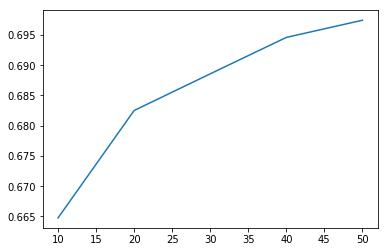

In [25]:
pyplot.plot([10,20,30,40,50],test_score )

In [26]:
'''
1. first_blood_time, first_blood_team  - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
2. 'radiant_win'
3. время 0:01:16.010437, качество 0.6897171100684416
4.имеет, модель с 40 деревьями дает прирост точности 6,5%, с 50 - прирост 10,7%. Для ускорения обучения можно уменьшить значение параметра max_depth
'''

'\n1. first_blood_time, first_blood_team  - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\n2. \'radiant_win\'\n3. время 0:01:16.010437, качество 0.6897171100684416\n4.имеет, модель с 40 деревьями дает прирост точности 6,5%, с 50 - прирост 10,7%. Для ускорения обучения можно уменьшить значение параметра max_depth\n'

In [27]:
#Подход 2: логистическая регрессия
#создаем сетку для оценки параметра С
grid = { 'C' : np.power( 10.0, np.arange(-100,10 ))}
grid

{'C': array([1.e-100, 1.e-099, 1.e-098, 1.e-097, 1.e-096, 1.e-095, 1.e-094,
        1.e-093, 1.e-092, 1.e-091, 1.e-090, 1.e-089, 1.e-088, 1.e-087,
        1.e-086, 1.e-085, 1.e-084, 1.e-083, 1.e-082, 1.e-081, 1.e-080,
        1.e-079, 1.e-078, 1.e-077, 1.e-076, 1.e-075, 1.e-074, 1.e-073,
        1.e-072, 1.e-071, 1.e-070, 1.e-069, 1.e-068, 1.e-067, 1.e-066,
        1.e-065, 1.e-064, 1.e-063, 1.e-062, 1.e-061, 1.e-060, 1.e-059,
        1.e-058, 1.e-057, 1.e-056, 1.e-055, 1.e-054, 1.e-053, 1.e-052,
        1.e-051, 1.e-050, 1.e-049, 1.e-048, 1.e-047, 1.e-046, 1.e-045,
        1.e-044, 1.e-043, 1.e-042, 1.e-041, 1.e-040, 1.e-039, 1.e-038,
        1.e-037, 1.e-036, 1.e-035, 1.e-034, 1.e-033, 1.e-032, 1.e-031,
        1.e-030, 1.e-029, 1.e-028, 1.e-027, 1.e-026, 1.e-025, 1.e-024,
        1.e-023, 1.e-022, 1.e-021, 1.e-020, 1.e-019, 1.e-018, 1.e-017,
        1.e-016, 1.e-015, 1.e-014, 1.e-013, 1.e-012, 1.e-011, 1.e-010,
        1.e-009, 1.e-008, 1.e-007, 1.e-006, 1.e-005, 1.e-004, 1.e-003,
 

In [28]:
#оцениваем качество логистической регрессии с L2-регуляризацией
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=X, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=X,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)


1e-21
C =  1e-100 best_c =  1e-21 0.5 Time elapsed: 0:06:23.563678
C =  1e-99 best_c =  1e-21 0.5 Time elapsed: 0:06:26.675543
C =  1e-98 best_c =  1e-21 0.5 Time elapsed: 0:06:29.808047
C =  1e-97 best_c =  1e-21 0.5 Time elapsed: 0:06:33.144347
C =  1e-96 best_c =  1e-21 0.5 Time elapsed: 0:06:36.296698
C =  1e-95 best_c =  1e-21 0.5 Time elapsed: 0:06:39.141720
C =  1e-94 best_c =  1e-21 0.5 Time elapsed: 0:06:42.307278
C =  1e-93 best_c =  1e-21 0.5 Time elapsed: 0:06:45.457397
C =  1e-92 best_c =  1e-21 0.5 Time elapsed: 0:06:48.526109
C =  1e-91 best_c =  1e-21 0.5 Time elapsed: 0:06:51.768799
C =  1e-90 best_c =  1e-21 0.5 Time elapsed: 0:06:54.964264
C =  1e-89 best_c =  1e-21 0.5 Time elapsed: 0:06:58.395374
C =  1e-88 best_c =  1e-21 0.5 Time elapsed: 0:07:01.420477
C =  1e-87 best_c =  1e-21 0.5 Time elapsed: 0:07:04.633051
C =  1e-86 best_c =  1e-21 0.5 Time elapsed: 0:07:08.010063
C =  1e-85 best_c =  1e-21 0.5 Time elapsed: 0:07:11.232737
C =  1e-84 best_c =  1e-21 0.5 Ti

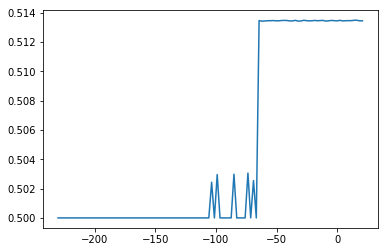

In [29]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [30]:
#создаем выборку без категориальных значений
no_categorials = features.drop([
'lobby_type',
'r1_hero',
'r2_hero',
'r3_hero',
'r4_hero',
'r5_hero',
'd1_hero',
'd2_hero',
'd3_hero',
'd4_hero',
'd5_hero'
], axis='columns')

In [31]:
#для логистической регресии заполняем пропуски значениями 0
no_categorials.fillna(inplace=True, value = 0)

In [32]:
#оцениваем качество логистической регрессии с L2-регуляризацией на выборке без категориальныъх значений 
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=no_categorials, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=no_categorials,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

1e-20
C =  1e-100 best_c =  1e-20 0.5 Time elapsed: 0:06:01.779861
C =  1e-99 best_c =  1e-20 0.5 Time elapsed: 0:06:04.191225
C =  1e-98 best_c =  1e-20 0.5 Time elapsed: 0:06:06.400595
C =  1e-97 best_c =  1e-20 0.5 Time elapsed: 0:06:08.984143
C =  1e-96 best_c =  1e-20 0.5 Time elapsed: 0:06:11.454663
C =  1e-95 best_c =  1e-20 0.5 Time elapsed: 0:06:13.658689
C =  1e-94 best_c =  1e-20 0.5 Time elapsed: 0:06:16.207643
C =  1e-93 best_c =  1e-20 0.5 Time elapsed: 0:06:18.501986
C =  1e-92 best_c =  1e-20 0.5 Time elapsed: 0:06:20.939571
C =  1e-91 best_c =  1e-20 0.5 Time elapsed: 0:06:23.543063
C =  1e-90 best_c =  1e-20 0.5 Time elapsed: 0:06:26.436352
C =  1e-89 best_c =  1e-20 0.5 Time elapsed: 0:06:29.381860
C =  1e-88 best_c =  1e-20 0.5 Time elapsed: 0:06:31.937181
C =  1e-87 best_c =  1e-20 0.5 Time elapsed: 0:06:34.610332
C =  1e-86 best_c =  1e-20 0.5 Time elapsed: 0:06:37.207850
C =  1e-85 best_c =  1e-20 0.5 Time elapsed: 0:06:40.245382
C =  1e-84 best_c =  1e-20 0.5 Ti

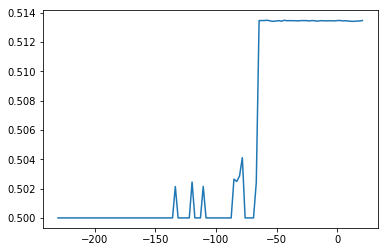

In [33]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [34]:
#выбираем уникальные идентификаторы героев
heroes = list(np.unique(features[['r1_hero', 'r2_hero','r3_hero','r4_hero', 'r5_hero','d1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']].values))

In [35]:
#уникальных идентификаторов героев - 108
len(heroes)

108

In [36]:
#создаем нулевую матрицу для мешка слов
X_pick = np.zeros((features.shape[0], 108))
X_pick.shape

(97230, 108)

In [37]:
#заполняем нулевую матрицу значениями 1 для игроков Radiant и -1 для Dire
for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, heroes.index(features.loc[match_id, 'r%d_hero' % (p+1)])] = 1
        X_pick[i, heroes.index(features.loc[match_id, 'd%d_hero' % (p+1)])] = -1
        

In [38]:
#создаем DataFrame для мешка слов
heroes_matches = pd.DataFrame(X_pick, columns=heroes)
heroes_matches['match_id'] = features.index
heroes_matches.shape

(97230, 109)

In [39]:
#добавлем индекс с идентификатором матча для последующего обьединения с тренировочной выборкой
heroes_matches.index  = heroes_matches['match_id']

In [40]:
#объединяем мешок слов с тренировочной выборкой без категориальных признаков
no_categorials_heroes = no_categorials.merge(heroes_matches, left_index=True, right_index=True)

In [41]:
##для логистической регресии заполняем пропуски значениями 0
no_categorials_heroes.fillna(inplace=True, value = 0)
no_categorials_heroes.count()

start_time    97230
r1_level      97230
r1_xp         97230
r1_gold       97230
r1_lh         97230
r1_kills      97230
r1_deaths     97230
r1_items      97230
r2_level      97230
r2_xp         97230
r2_gold       97230
r2_lh         97230
r2_kills      97230
r2_deaths     97230
r2_items      97230
r3_level      97230
r3_xp         97230
r3_gold       97230
r3_lh         97230
r3_kills      97230
r3_deaths     97230
r3_items      97230
r4_level      97230
r4_xp         97230
r4_gold       97230
r4_lh         97230
r4_kills      97230
r4_deaths     97230
r4_items      97230
r5_level      97230
              ...  
81            97230
82            97230
83            97230
84            97230
85            97230
86            97230
87            97230
88            97230
89            97230
90            97230
91            97230
92            97230
93            97230
94            97230
95            97230
96            97230
97            97230
98            97230
99            97230


In [42]:
#оцениваем качество логистической регрессии с L2-регуляризацией на выборке без категориальныъх значений с добавленным мешком слов
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=no_categorials_heroes, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=no_categorials_heroes,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

1e-20
C =  1e-100 best_c =  1e-20 0.5 Time elapsed: 0:11:33.407810
C =  1e-99 best_c =  1e-20 0.5 Time elapsed: 0:11:38.544517
C =  1e-98 best_c =  1e-20 0.5 Time elapsed: 0:11:44.523282
C =  1e-97 best_c =  1e-20 0.5 Time elapsed: 0:11:49.453615
C =  1e-96 best_c =  1e-20 0.5 Time elapsed: 0:11:53.916907
C =  1e-95 best_c =  1e-20 0.5 Time elapsed: 0:11:59.109666
C =  1e-94 best_c =  1e-20 0.5 Time elapsed: 0:12:04.149018
C =  1e-93 best_c =  1e-20 0.5 Time elapsed: 0:12:09.837759
C =  1e-92 best_c =  1e-20 0.5 Time elapsed: 0:12:15.738179
C =  1e-91 best_c =  1e-20 0.5 Time elapsed: 0:12:21.448365
C =  1e-90 best_c =  1e-20 0.5 Time elapsed: 0:12:27.835768
C =  1e-89 best_c =  1e-20 0.5 Time elapsed: 0:12:33.930197
C =  1e-88 best_c =  1e-20 0.5 Time elapsed: 0:12:39.060397
C =  1e-87 best_c =  1e-20 0.5 Time elapsed: 0:12:44.673421
C =  1e-86 best_c =  1e-20 0.5 Time elapsed: 0:12:50.013019
C =  1e-85 best_c =  1e-20 0.5 Time elapsed: 0:12:54.775409
C =  1e-84 best_c =  1e-20 0.5 Ti

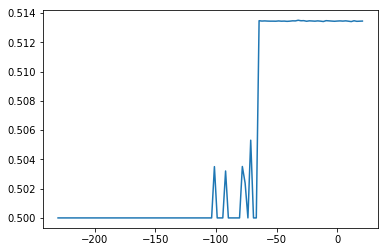

In [43]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [44]:
#считываем таблицу с тестовой выборкой
X_test = pd.read_csv('features_test.csv', index_col='match_id') 

In [45]:
#лучшее качество показал градиентный бустинг, пропуски заполняем значением -1
X_test.fillna(inplace=True, value =-1)

In [46]:
#обучаем классификатор на тренировочной выборке со значением параметра n_estimators=100, предсказываем значения для тестовой выборки
best_clf = GradientBoostingClassifier(n_estimators=100)
best_clf.fit(X=X,y=y)
pred = best_clf.predict_proba(X_test)

In [47]:
#формируем строку с результатами предсказаний
match_pred = ''
for i in range(len(pred[:, 1])): 
    match_pred +='{0}, {1}\n'.format(X_test.index[i], pred[:, 1][i])    

In [48]:
#выгружаем результаты предсказаний в файл
with open('pred.csv','w') as f:
    f.write(match_pred)